# DATA SET LINK 
## https://www.kaggle.com/datasets/emmarex/plantdisease

## IMPORT libraries 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #SG MAT
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report #PER REP

## DATA preprocessing

### training image preprocessing 

In [54]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\data set\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [55]:
# Create the validation_set dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Get the class names
class_names = validation_set.class_names

# Print the class names
print("Class names:", class_names)

Found 17572 files belonging to 38 classes.
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Sp

In [56]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [57]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[188.   167.   176.  ]
   [192.   171.   180.  ]
   [222.25 204.75 213.25]
   ...
   [194.25 178.25 188.25]
   [184.5  168.5  178.5 ]
   [195.75 179.75 189.75]]

  [[194.   173.   182.  ]
   [181.5  160.5  169.5 ]
   [191.5  170.5  179.5 ]
   ...
   [204.75 188.75 198.75]
   [202.75 186.75 196.75]
   [214.5  198.5  208.5 ]]

  [[190.25 169.25 178.25]
   [183.25 162.25 171.25]
   [205.5  184.5  193.5 ]
   ...
   [187.5  171.5  181.5 ]
   [193.5  177.5  187.5 ]
   [208.75 192.75 202.75]]

  ...

  [[224.25 211.25 218.25]
   [237.   224.   231.  ]
   [226.5  213.5  220.5 ]
   ...
   [246.25 241.25 245.25]
   [245.   240.   244.  ]
   [248.75 243.75 247.75]]

  [[226.75 215.5  222.25]
   [231.75 219.25 226.25]
   [229.75 217.   224.  ]
   ...
   [244.5  239.5  243.5 ]
   [253.5  250.   253.  ]
   [253.5  249.25 252.75]]

  [[229.5  217.   224.  ]
   [228.   215.   222.  ]
   [238.5  225.5  232.5 ]
   ...
   [240.   235.   239.  ]
   [242.5  237.5  241.5 ]
   [248.75 244.5  24

### Building Model

In [58]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [59]:
cnn = tf.keras.models.Sequential()

## Building Convolutional Model

In [60]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\achar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [61]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [62]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [63]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [64]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [65]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [66]:
cnn.add(tf.keras.layers.Flatten())

In [67]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [68]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [69]:
## output layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling Model

In [70]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## MODEL TRAINING

In [56]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 2557s 5s/step - accuracy: 0.2960 - loss: 2.5656 - val_accuracy: 0.7781 - val_loss: 0.7154
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 2042s 4s/step - accuracy: 0.7614 - loss: 0.7612 - val_accuracy: 0.8694 - val_loss: 0.4014
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 2004s 4s/step - accuracy: 0.8562 - loss: 0.4496 - val_accuracy: 0.9054 - val_loss: 0.2897
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 2619s 5s/step - accuracy: 0.9043 - loss: 0.2962 - val_accuracy: 0.9132 - val_loss: 0.2696
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 29484s 54s/step - accuracy: 0.9265 - loss: 0.2192 - val_accuracy: 0.9344 - val_loss: 0.2076
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 3674s 7s/step - accuracy: 0.9452 - loss: 0.1625 - val_accuracy: 0.9503 - val_loss: 0.1598
Epoch 7/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 2949s 5s/step - accuracy: 0.9587 - loss: 0.1232 - val_accuracy: 0.9585 - val_loss: 0.1300
Epoch 8/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 1991s 4s/step - accuracy: 0.9642 - loss: 0.1049 

## MODEL EVALUATION 

In [57]:
#model Evaluation on Training set
train_loss,train_acc = cnn.evaluate(training_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 640s 1s/step - accuracy: 0.9844 - loss: 0.0485


In [58]:
print(train_loss,train_acc)

0.045065686106681824 0.9860160946846008


In [59]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

138/138 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.9526 - loss: 0.1599
Validation accuracy: 0.954245388507843


# SAVING MODEL

In [60]:
cnn.save('trained_plant_disease_model.keras')

In [61]:
training_history.history 

{'accuracy': [0.4891386330127716,
  0.7947791218757629,
  0.8718827962875366,
  0.9129383563995361,
  0.932598352432251,
  0.9488726258277893,
  0.961320161819458,
  0.9658581614494324,
  0.9729995131492615,
  0.9749768972396851],
 'loss': [1.766723871231079,
  0.6522012948989868,
  0.39822065830230713,
  0.2692294418811798,
  0.20057067275047302,
  0.1524907946586609,
  0.11767653375864029,
  0.10062254220247269,
  0.0799812376499176,
  0.073162741959095],
 'val_accuracy': [0.7781128883361816,
  0.8693944811820984,
  0.9054176807403564,
  0.9132142066955566,
  0.9343842267990112,
  0.9503186941146851,
  0.9585135579109192,
  0.9635215401649475,
  0.9585704803466797,
  0.954245388507843],
 'val_loss': [0.7153806686401367,
  0.40135806798934937,
  0.2897111177444458,
  0.26959744095802307,
  0.20759114623069763,
  0.15976783633232117,
  0.1300167292356491,
  0.12214978784322739,
  0.1284308135509491,
  0.14885877072811127]}

In [63]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [64]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [65]:
print(training_history.history['accuracy'])

[0.4891386330127716, 0.7947791218757629, 0.8718827962875366, 0.9129383563995361, 0.932598352432251, 0.9488726258277893, 0.961320161819458, 0.9658581614494324, 0.9729995131492615, 0.9749768972396851]


## ACCURACY VISUALIZATION

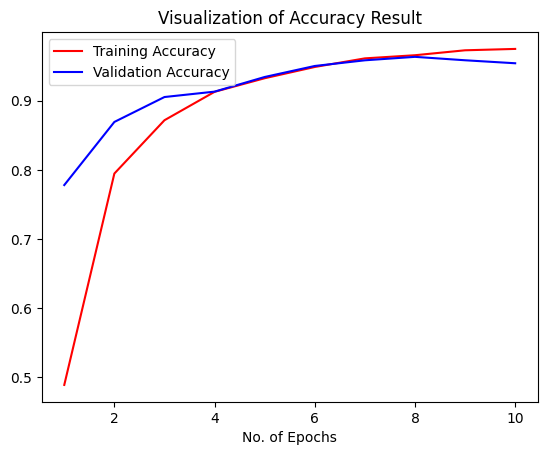

In [66]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## SOME OTHER MATRICES FOR MODEL VISUALIZATION 

In [72]:
# Get the class names
class_names = validation_set.class_names

# Print the class names
print("Class names:", class_names)

Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat

In [73]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [74]:
y_pred = cnn.predict(test_set)
y_pred,y_pred.shape

138/138 ━━━━━━━━━━━━━━━━━━━━ 108s 787ms/step


(array([[0.03250761, 0.01113353, 0.04149241, ..., 0.03224627, 0.01781243,
         0.03340012],
        [0.03559979, 0.01247067, 0.04099054, ..., 0.03531483, 0.02003573,
         0.02342328],
        [0.03655781, 0.01231152, 0.04285089, ..., 0.03187928, 0.01604589,
         0.03118168],
        ...,
        [0.03464181, 0.01088086, 0.04015096, ..., 0.03160226, 0.01779008,
         0.02916609],
        [0.03268641, 0.01177602, 0.03833693, ..., 0.03293331, 0.01835307,
         0.02923879],
        [0.02949312, 0.00778307, 0.04671398, ..., 0.02995981, 0.01444807,
         0.03559142]], dtype=float32),
 (17572, 38))

In [30]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [31]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([32, 32, 32, ..., 32, 32, 32], dtype=int64)>

In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [75]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       504
                                 Apple___Black_rot       0.00      0.00      0.00       497
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       440
                                   Apple___healthy       0.00      0.00      0.00       502
                               Blueberry___healthy       0.05      0.02      0.02       454
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       421
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       410
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

C:\Users\achar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo